<a href="https://colab.research.google.com/github/mounikasrinivasarao/barath_Intern-Internship-/blob/main/Spam_Detection(DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [7]:
df.drop_duplicates(inplace=True)

<Axes: >

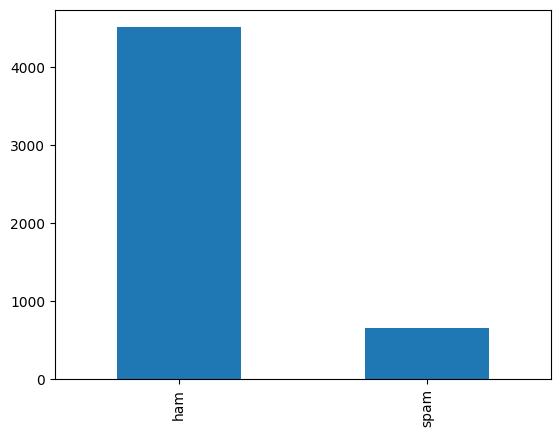

In [8]:
df['v1'].value_counts().plot.bar()

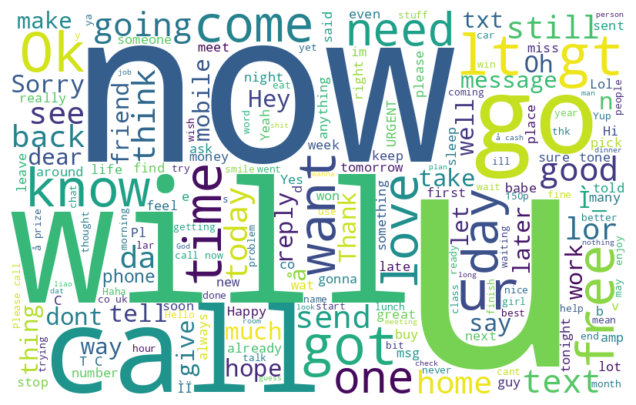

In [9]:
from wordcloud import WordCloud
text=' '.join(df['v2'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


**Data PreProcessing**

In [10]:
def lowerChange(text):
    return text.lower()

df['v2']=df['v2'].apply(lowerChange)
df['v2']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5169, dtype: object

In [16]:
import nltk

# Download the 'punkt' and 'stopwords' resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt' and 'stopwords' resources
nltk.download('punkt')
nltk.download('stopwords')

def Preprocess(text):
    # Remove punctuations & numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Tokenize sentence into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    return words

df['txt'] = df['v2'].apply(Preprocess)
df.head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,txt
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
5,spam,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, darling, week, word, back, like..."
6,ham,even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids..."
7,ham,as per your request 'melle melle (oru minnamin...,"[per, request, melle, melle, oru, minnaminungi..."
8,spam,winner!! as a valued network customer you have...,"[winner, valued, network, customer, selected, ..."
9,spam,had your mobile 11 months or more? u r entitle...,"[mobile, months, u, r, entitled, update, lates..."


In [18]:
df.drop('v2',axis=1,inplace=True)

In [19]:
df['v1']=df['v1'].str.replace('ham','0').str.replace('spam','1').astype(int)

**Word Cloud of HAM**

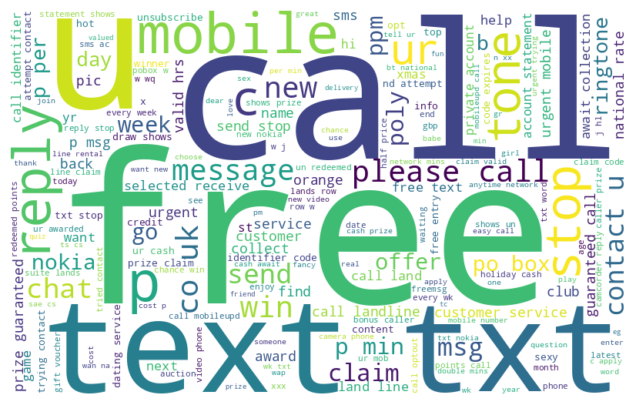

In [20]:
df_1=df[df['v1']==1]

df_1 = df[df['v1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud of SPAM**

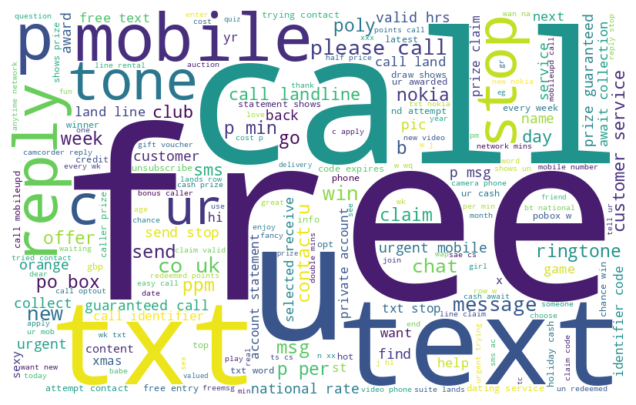

In [21]:
df_1=df[df['v1']==0]

df_1 = df[df['v1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Vectorize Text**

In [22]:
df.head()

,v1,txt
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

countvector=CountVectorizer()
sentence_as_x=[' '.join(tokens) for tokens in df['txt']]

X=countvector.fit_transform(sentence_as_x)

**Data Splitting**

In [24]:
from sklearn.model_selection import train_test_split
y=df['v1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.toarray()
X_test=X_test.toarray()

**MODELLING**

In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [27]:
#GaussianNb
gaussNB=GaussianNB()
gaussNB.fit(X_train,y_train)

#MultinomialNB
multiNB=MultinomialNB()
multiNB.fit(X_train,y_train)

#BernoulliNB
BerNB=BernoulliNB()
BerNB.fit(X_train,y_train)

BernoulliNB()

In [28]:
gaussNBPre=gaussNB.predict(X_test)
multiNBPre=multiNB.predict(X_test)
BerNBPre=BerNB.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("From Gaussian model",accuracy_score(y_test,gaussNBPre))
print("From Multinomial model",accuracy_score(y_test,multiNBPre))
print("From Bernoulli model",accuracy_score(y_test,BerNBPre))

From Gaussian model 0.8781431334622823
From Multinomial model 0.971953578336557
From Bernoulli model 0.9709864603481625
